##### Determinando o cojunto de dados alvo do ajuste de drift

In [9]:
#define o arquivo alvo do ajuste -ABQ
MEDIDA_ALVO_DO_AJUSTE = "Ta_CoFeB_Ta_x_25_000.txt"

#declara-se aqui a constante para a quantidade de pontos que serão utilizados para calcular as médias. altere o valor dessa constante conforme adequar-se à curva crua -ABQ
QNT_PONTOS = int(12) #explicitar a tipagem "int()" é redundante, pois o valor já é um inteiro e o python entende esta declaração em letras maiúsculas como uma constante,, ainda assim, pra evitar loucuras pythonicas, explicitamos aqui -ABQ

##### Localizando pontos na região de saturação para serem ajustados </h5>

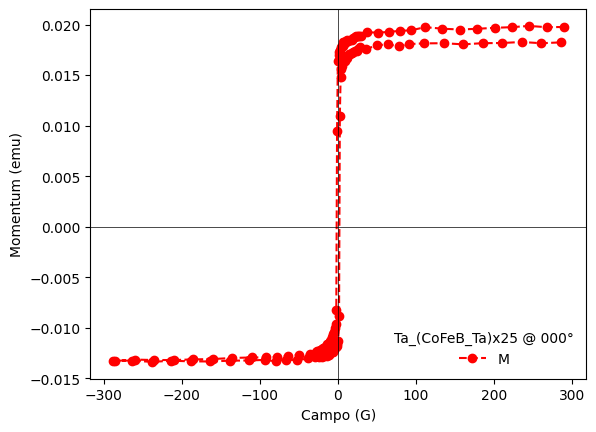

In [10]:
"""
CARREGANDO MÓDULOS NECESSÁRIOS
"""

import numpy as np #bibloteca para manipulação de arrays e aplicações matemáticas -CLEIZA #type: ignore
import matplotlib.pyplot as plt #biblioteca para plot de figuras -CLEIZA #type: ignore
import os #biblioteca para manipulação de diretórios/arquivos -CLEIZA
from caminhosDiretorios import dirDadosDesteDispositivo as dirDados #variavel que guarda o caminho do diretório dos arquivos de medida -ABQ
from funcoesNomeDeArquivo import extrair_angulo, nomeConcatenadoDaAmostra #de funcoesNomeDeArquivo.py, chamamos aqui funcoes que extraem partes do nome do arquivo -ABQ
from funcoesDeMatrizENormalizacao import metadeDoVetor, coeficienteAngular #de funcoesDeMatrizENormalizacao.py, chamamos aqui funcoes que manipulam matrizes -ABQ

"""
CHAMANDO E RECONHECENDO DADOS
"""

#subdiretorio especifico que este script vai varrer para extrair os dados especificos, neste caso, será "/dadosMenos12/". -ABQ
subdiretorioDeDadosAVarrer = dirDados+"dadosCrusMenos12/"

# Lista todos os arquivos na pasta -CLEIZA
arquivos = os.listdir(subdiretorioDeDadosAVarrer)

# Filtra apenas os arquivos .txt -CLEIZA
arquivos_txt = [arquivo for arquivo in arquivos if arquivo.endswith('.txt')]

#compreende o caminho do arquivo alvo do ajuste -ABQ
caminho_arquivo = os.path.join(subdiretorioDeDadosAVarrer, MEDIDA_ALVO_DO_AJUSTE)

# Extrai o ângulo do nome do arquivo -CLEIZA
angulo = extrair_angulo(os.path.basename(caminho_arquivo))

# Carrega os dados do arquivo -CLEIZA
dados = np.loadtxt(caminho_arquivo)

# Extrai os dados de campo e magnetização -CLEIZA
campo = dados[:, 0]
magnetizacao = dados[:, 1]

"""
DIVIDINDO A CURVA DE HISTERESE EM DUAS (SUBIDA E DESCIDA)
"""

# Separando a curva de histerese em subida e descida-CLEIZA
campo_descida = campo[:metadeDoVetor(campo)]
magnetizacao_descida = magnetizacao[:metadeDoVetor(magnetizacao)]
campo_subida = campo[metadeDoVetor(campo):]
magnetizacao_subida = magnetizacao[metadeDoVetor(magnetizacao):]

"""
DEFININDO CARACTERÍSTICAS DA FIGURA (OPTATIVO)
"""
"""
# Define o tamanho da figura -CLEIZA
fig_size = (10, 8)

# Define o tamanho da fonte dos rótulos dos eixos x e y -CLEIZA
fonte_eixos = 14

# Define o tamanho da fonte dos títulos -CLEIZA
fonte_titulo = 16

# Define o tamanho dos números nos eixos x e y -CLEIZA
tamanho_numeros = 12

# Define o tamanho da fonte da legenda -CLEIZA
tamanho_legenda = 12

# Cria uma nova figura com tamanho definido -CLEIZA
plt.figure(figsize=fig_size)
"""
# Plota todos os pontos da curva de descida -CLEIZA
plt.plot(campo, magnetizacao, '--o', label='M', color='red')

# Plota todos os pontos da curva de subida -CLEIZA
#plt.plot(campo_subida, magnetizacao_subida, '--o', label='Subida', color='blue')

# Adiciona linhas de eixo
plt.axhline(0, color='black', linewidth=0.5)  # Linha de grade zero para magnetização -CLEIZA
plt.axvline(0, color='black', linewidth=0.5)  # Linha de grade zero para campo -CLEIZA

# Adiciona grade ao gráfico (optativo)
#plt.grid(True, which='both', linestyle='-', color='gray',  linewidth=0.3)
#plt.grid(True, which='major', axis='both', color='gray', linewidth=0.3)

# Adiciona título e rótulos com tamanho de fonte personalizado -CLEIZA
plt.xlabel('Campo (G)') #optativamente, adicione aqui o argumento fontsize=fonte_eixos -ABQ
plt.ylabel('Momentum (emu)') #optativamente, adicione aqui o argumento fontsize=fonte_eixos -ABQ
plt.legend(loc = "lower right", title=f'{nomeConcatenadoDaAmostra(MEDIDA_ALVO_DO_AJUSTE)} @ {angulo}°', frameon=False)

# Define o tamanho dos números nos eixos x e y (optativo) -CLEIZA
#plt.tick_params(axis='both', which='major', labelsize=tamanho_numeros)

# Exibe o gráfico -CLEIZA
plt.show()


##### Visualização da evolução da magnetização de acordo como índice do campo

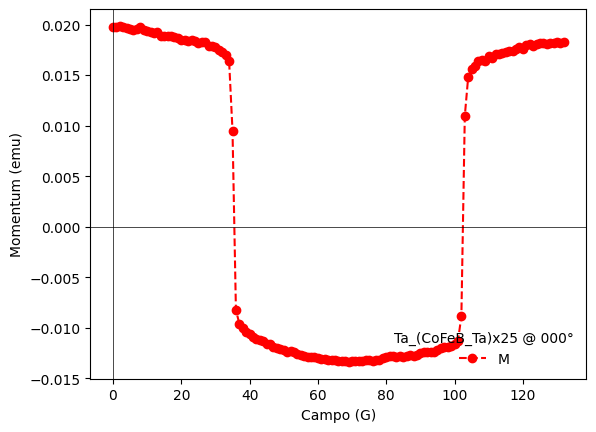

In [11]:
#plota a evolucação da magnetização em função do índice do campo -ABQ
plt.plot(range(len(campo)), magnetizacao, '--o', label='Magnetização', color='red')

# Plota todos os pontos da curva de subida -CLEIZA
#plt.plot(campo_subida, magnetizacaoSubidaCopia, '--o', label='Subida', color='blue')

# Adiciona linhas de eixo -CLEIZA
plt.axhline(0, color='black', linewidth=0.5)  # Linha de grade zero para magnetização -CLEIZA
plt.axvline(0, color='black', linewidth=0.5)  # Linha de grade zero para campo -CLEIZA


# Adiciona grade ao gráfico (optativo)
#plt.grid(True, which='both', linestyle='-', color='gray',  linewidth=0.3)
#plt.grid(True, which='major', axis='both', color='gray', linewidth=0.3)

# Adiciona Rótulos com tamanho de fonte personalizado -CLEIZA
plt.xlabel('Campo (G)') #optativamente, adicione aqui o argumento "fontsize=fonte_eixos" -ABQ
plt.ylabel('Momentum (emu)') #optativamente, adicione aqui o argumento "fontsize=fonte_eixos" -ABQ
plt.legend(["M"], loc="lower right", title=f'{nomeConcatenadoDaAmostra(MEDIDA_ALVO_DO_AJUSTE)} @ {angulo}°', frameon=False) #optativamente, adicione aqui o argumento fontsize=fonte_titulo -ABQ

# Define o tamanho dos números nos eixos x e y (optativo) -CLEIZA
#plt.tick_params(axis='both', which='major', labelsize=tamanho_numeros)

# Adiciona legenda com tamanho de fonte personalizado -CLEIZA
#plt.legend(fontsize=tamanho_legenda) -CLEIZA

# Exibe o gráfico -CLEIZA
plt.show()


##### Elucidação dos pontos chave

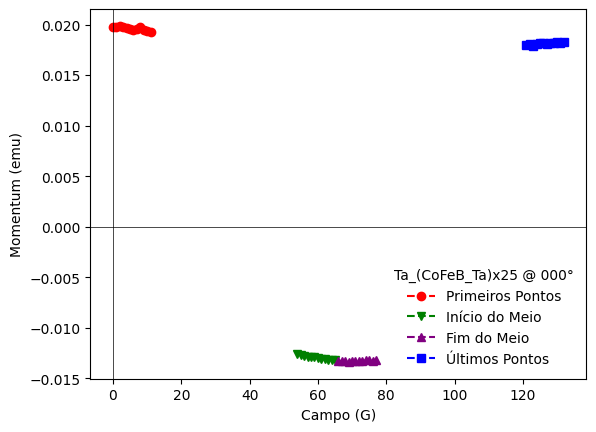

In [12]:
#obtem-se o tamanho do vetor de "campo" para plotagem da evolução da magnetização de acordo com o índice do campo -ABQ
primeirosPontosMagnetizacao = magnetizacao[:QNT_PONTOS] #obtem-se os primeiros QNT_PONTOS da magnetização -ABQ
ultimosPontosMagnetizacao = magnetizacao[-QNT_PONTOS:] #obtem-se os últimos QNT_PONTOS da magnetização -ABQ

tamanhoDoCampo = range(len(campo))
primeirosPontosTamanhoDoCampo = tamanhoDoCampo[:QNT_PONTOS] #obtem-se os primeiros QNT_PONTOS do tamanho do campo -ABQ
ultimosPontosTamanhoDoCampo = tamanhoDoCampo[-QNT_PONTOS:] #obtem-se os últimos QNT_PONTOS do tamanho do campo -ABQ


indicesMeioMagnetizacao = len(magnetizacao)//2 #obtem-se o ponto médio do vetor de magnetização -ABQ
indicesMeioInicioMagnetizacao = indicesMeioMagnetizacao - QNT_PONTOS #obtem-se o início do meio da magnetização -ABQ
indicesMeioFimMagnetizacao = indicesMeioMagnetizacao + QNT_PONTOS #obtem-se o fim do meio da magnetização -ABQ
pontosDoMeioMagnetizacao = magnetizacao[indicesMeioInicioMagnetizacao:indicesMeioFimMagnetizacao] #obtem-se os pontos do meio da magnetização -ABQ

meioPontosMagnetizacao = len(pontosDoMeioMagnetizacao) #obtem-se o tamanho do vetor de pontos do meio da magnetização -ABQ
pontosMeioInicioMagnetizacao = pontosDoMeioMagnetizacao[:(meioPontosMagnetizacao//2)] #obtem-se os primeiros pontos do meio da magnetização -ABQ
pontosMeioFimMagnetizacao = pontosDoMeioMagnetizacao[(meioPontosMagnetizacao//2):] #obtem-se os últimos pontos do meio da magnetização -ABQ


indiceMeioTamanhoDoCampo = len(campo)//2 #obtem-se o ponto médio do vetor de campo -ABQ
indiceMeioInicioTamanhoDoCampo = indiceMeioTamanhoDoCampo - QNT_PONTOS #obtem-se o ponto médio do vetor de tamanho do campo e subtrai-se QNT_PONTOS para obter o início do meio do tamanho do campo -ABQ
indiceMeioFimTamanhoDoCampo = indiceMeioTamanhoDoCampo + QNT_PONTOS #obtem-se o ponto médio do vetor de tamanho do campo e soma-se QNT_PONTOS para obter o fim do meio do tamanho do campo -ABQ
pontosDoMeioDoCampo = tamanhoDoCampo[indiceMeioInicioTamanhoDoCampo:indiceMeioFimTamanhoDoCampo] #obtem-se os pontos do meio do tamanho do campo -ABQ

meioPontosTamanhoDoCampo = len(pontosDoMeioDoCampo) //2#obtem-se o tamanho do vetor de pontos do meio do tamanho do campo -ABQ
pontosMeioInicioTamanhoDocampo = pontosDoMeioDoCampo[:meioPontosTamanhoDoCampo] #obtem-se os primeiros pontos do meio do tamanho do campo -ABQ
pontosMeioFimTamanhoDoCampo = pontosDoMeioDoCampo[meioPontosTamanhoDoCampo:] #obtem-se os últimos pontos do meio do tamanho do campo -ABQ

#plota a evolucação da magnetização em função do índice do campo -ABQ
plt.plot(primeirosPontosTamanhoDoCampo, primeirosPontosMagnetizacao, '--o', label='Primeiros Pontos', color='red') #plota os primeiros QNT_PONTOS da magnetização -ABQ
plt.plot(pontosMeioInicioTamanhoDocampo, pontosMeioInicioMagnetizacao, '--v', label='Início do Meio', color='green') #plota os primeiros pontos do meio da magnetização -ABQ
plt.plot(pontosMeioFimTamanhoDoCampo, pontosMeioFimMagnetizacao, '--^', label='Fim do Meio', color='purple') #plota os últimos pontos do meio da magnetização -ABQ
plt.plot(ultimosPontosTamanhoDoCampo, ultimosPontosMagnetizacao, '--s', label='Últimos Pontos', color='blue') #plota os últimos QNT_PONTOS da magnetização -ABQ

# Plota todos os pontos da curva de subida -CLEIZA
#plt.plot(campo_subida, magnetizacaoSubidaCopia, '--o', label='Subida', color='blue')

# Adiciona linhas de eixo -CLEIZA
plt.axhline(0, color='black', linewidth=0.5)  # Linha de grade zero para magnetização -CLEIZA
plt.axvline(0, color='black', linewidth=0.5)  # Linha de grade zero para campo -CLEIZA

# Adiciona Rótulos -CLEIZA
plt.xlabel('Campo (G)')
plt.ylabel('Momentum (emu)')
plt.legend(loc="lower right", title=f'{nomeConcatenadoDaAmostra(MEDIDA_ALVO_DO_AJUSTE)} @ {angulo}°', frameon=False) 

# Exibe o gráfico -CLEIZA
plt.show()

##### Ajuste dos pontos de acordo com os respectivos coeficientes angulares


Coeficiente Angular dos Primeiros Pontos: -4.155979020979027e-05
Coeficiente Angular dos Últimos Pontos: 2.6712937062936883e-05
Coeficiente Angular do Início do Meio: -5.279720279720305e-05
Coeficiente Angular do Fim do Meio: 7.948251748251932e-06

Média dos Coeficientes Angulares Superiores: -7.4234265734266925e-06
Média dos Coeficientes Angulares Inferiores: -2.242447552447556e-05

[0.0197619 0.0197397 0.0198659 0.0197438 0.0196766 0.0195833 0.0195088
 0.0195914 0.0197411 0.0194357 0.0193759 0.019284 ], [0.01976932 0.01974712 0.01987332 0.01975122 0.01968402 0.01959072
 0.01951622 0.01959882 0.01974852 0.01944312 0.01938332 0.01929142]
[0.0179341 0.0180643 0.0178428 0.0180731 0.0181388 0.0181563 0.0180428
 0.0181583 0.0181764 0.0182778 0.0181536 0.0182368], [0.01792668 0.01805688 0.01783538 0.01806568 0.01813138 0.01814888
 0.01803538 0.01815088 0.01816898 0.01827038 0.01814618 0.01822938]
[-0.0126159 -0.0126827 -0.0127656 -0.0128693 -0.0129341 -0.0129327
 -0.0129847 -0.0130905 -0.0

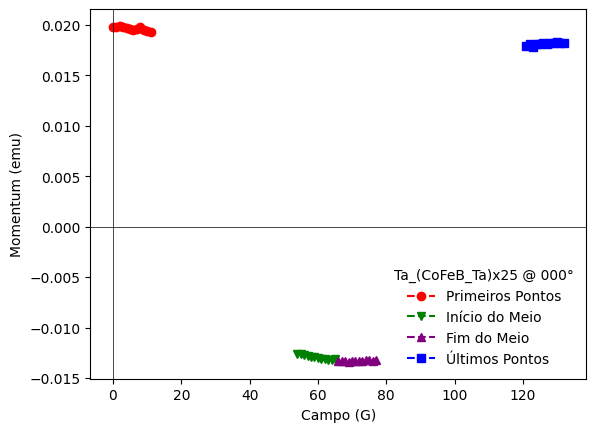

In [13]:
#funções que calculam os coeficientes angulares de um determinado intervalo de pontos -ABQ
coefPrimeirosPontos = coeficienteAngular(primeirosPontosTamanhoDoCampo, primeirosPontosMagnetizacao) #calcula o coeficiente angular dos primeiros QNT_PONTOS da magnetização -ABQ
coefUltimosPontos = coeficienteAngular(ultimosPontosTamanhoDoCampo, ultimosPontosMagnetizacao) #calcula o coeficiente angular dos últimos QNT_PONTOS da magnetização -ABQ
coefMeioInicio = coeficienteAngular(pontosMeioInicioTamanhoDocampo, pontosMeioInicioMagnetizacao) #calcula o coeficiente angular dos primeiros pontos do meio da magnetização -ABQ
coefMeioFim = coeficienteAngular(pontosMeioFimTamanhoDoCampo, pontosMeioFimMagnetizacao) #calcula o coeficiente angular dos últimos pontos do meio da magnetização -ABQ

#printa os coeficientes angulares calculados -ABQ
print(f"""
Coeficiente Angular dos Primeiros Pontos: {coefPrimeirosPontos}
Coeficiente Angular dos Últimos Pontos: {coefUltimosPontos}
Coeficiente Angular do Início do Meio: {coefMeioInicio}
Coeficiente Angular do Fim do Meio: {coefMeioFim}
""")

mediaCoefSuperiores = np.mean([coefPrimeirosPontos, coefUltimosPontos]) #calcula a média dos coeficientes angulares dos primeiros e últimos QNT_PONTOS da magnetização -ABQ
mediaCoefInferiores = np.mean([coefMeioInicio, coefMeioFim]) #calcula a média dos coeficientes angulares dos primeiros e últimos pontos do meio da magnetização -ABQ

print(f"Média dos Coeficientes Angulares Superiores: {mediaCoefSuperiores}\nMédia dos Coeficientes Angulares Inferiores: {mediaCoefInferiores}") #printa as médias calculadas -ABQ

ajustePrimeirosPontosMagnetizacao = primeirosPontosMagnetizacao - mediaCoefSuperiores
ajusteUltimosPontosMagnetizacao = ultimosPontosMagnetizacao + mediaCoefSuperiores
ajusteMeioInicioMagnetizacao = pontosMeioInicioMagnetizacao - mediaCoefInferiores
ajusteMeioFimMagnetizacao = pontosMeioFimMagnetizacao + mediaCoefInferiores

plt.plot(primeirosPontosTamanhoDoCampo, ajustePrimeirosPontosMagnetizacao, '--o', label='Primeiros Pontos', color='red') #plota os primeiros QNT_PONTOS da magnetização -ABQ
plt.plot(pontosMeioInicioTamanhoDocampo, ajusteMeioInicioMagnetizacao, '--v', label='Início do Meio', color='green') #plota os primeiros pontos do meio da magnetização -ABQ
plt.plot(pontosMeioFimTamanhoDoCampo, ajusteMeioFimMagnetizacao, '--^', label='Fim do Meio', color='purple') #plota os últimos pontos do meio da magnetização -ABQ
plt.plot(ultimosPontosTamanhoDoCampo, ajusteUltimosPontosMagnetizacao, '--s', label='Últimos Pontos', color='blue') #plota os últimos QNT_PONTOS da magnetização -ABQ


print(f"""
{primeirosPontosMagnetizacao}, {ajustePrimeirosPontosMagnetizacao}
{ultimosPontosMagnetizacao}, {ajusteUltimosPontosMagnetizacao}
{pontosMeioInicioMagnetizacao}, {ajusteMeioInicioMagnetizacao}
{pontosMeioFimMagnetizacao}, {ajusteMeioFimMagnetizacao}
""")
# Plota todos os pontos da curva de subida -CLEIZA
#plt.plot(campo_subida, magnetizacaoSubidaCopia, '--o', label='Subida', color='blue')

# Adiciona linhas de eixo -CLEIZA
plt.axhline(0, color='black', linewidth=0.5)  # Linha de grade zero para magnetização -CLEIZA
plt.axvline(0, color='black', linewidth=0.5)  # Linha de grade zero para campo -CLEIZA

# Adiciona Rótulos -CLEIZA
plt.xlabel('Campo (G)')
plt.ylabel('Momentum (emu)')
plt.legend(loc="lower right", title=f'{nomeConcatenadoDaAmostra(MEDIDA_ALVO_DO_AJUSTE)} @ {angulo}°', frameon=False) 

# Exibe o gráfico -CLEIZA
plt.show()

##### Incorporação dos dados ajustados na curva de histerese

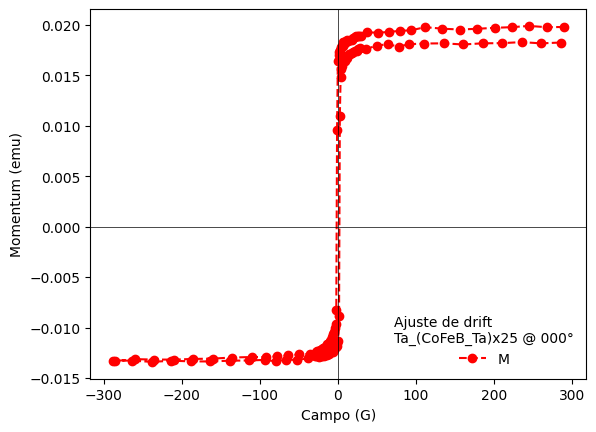

In [14]:
magnetizacaoAjustada = magnetizacao.copy()
magnetizacaoAjustada[:QNT_PONTOS] = ajustePrimeirosPontosMagnetizacao
magnetizacaoAjustada[-QNT_PONTOS:] = ajusteUltimosPontosMagnetizacao
magnetizacaoAjustada[indicesMeioInicioMagnetizacao:indicesMeioFimMagnetizacao] = np.concatenate([ajusteMeioInicioMagnetizacao, ajusteMeioFimMagnetizacao])

plt.plot(campo, magnetizacaoAjustada, '--o', label='M', color='red')

# Adiciona linhas de eixo
plt.axhline(0, color='black', linewidth=0.5)  # Linha de grade zero para magnetização -CLEIZA
plt.axvline(0, color='black', linewidth=0.5)  # Linha de grade zero para campo -CLEIZA

# Adiciona grade ao gráfico (optativo)
#plt.grid(True, which='both', linestyle='-', color='gray',  linewidth=0.3)
#plt.grid(True, which='major', axis='both', color='gray', linewidth=0.3)

# Adiciona título e rótulos com tamanho de fonte personalizado -CLEIZA
plt.xlabel('Campo (G)') #optativamente, adicione aqui o argumento fontsize=fonte_eixos -ABQ
plt.ylabel('Momentum (emu)') #optativamente, adicione aqui o argumento fontsize=fonte_eixos -ABQ
plt.legend(loc = "lower right", title=f'Ajuste de drift\n{nomeConcatenadoDaAmostra(MEDIDA_ALVO_DO_AJUSTE)} @ {angulo}°', frameon=False)

# Define o tamanho dos números nos eixos x e y (optativo) -CLEIZA
#plt.tick_params(axis='both', which='major', labelsize=tamanho_numeros)

# Exibe o gráfico -CLEIZA
plt.show()


##### Salvando um novo .txt com os dados ajustados
Cria-se um novo diretório dentro do diretório mãe diretorioDados contendo os dados ajustados para drift, que serão conjuntamente colocados com dados que não necessitaram ser ajustados e normalizados posteriormente

In [17]:
#cria diretorio onde será salvo os novos dados ajustados caso ainda não exista -ABQ
os.makedirs(dirDados+"dadosMenosDrift/", exist_ok=True)

# Caminho onde deseja salvar o novo arquivo .txt -CLEIZA
subdiretorioDadosMenosDrift = dirDados+"dadosMenosDrift/"

# Obtém o nome do arquivo original sem o diretório -ABQ
novoArquivoAjustado = os.path.basename(caminho_arquivo)

#salva os dados substituídos em um novo arquivo -CLEIZA/ABQ
novo_caminho_arquivo = os.path.join(subdiretorioDadosMenosDrift, novoArquivoAjustado)
dados.to_csv(novo_caminho_arquivo, index=False, header=False, sep=" ")

#print(f'Os dados substituídos foram salvos no arquivo: {novo_caminho_arquivo}')

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Albuquerque\AppData\Local\Temp\ipykernel_10692\3646192950.py:12: SyntaxWarning: invalid escape sequence '\s'
  np.savetxt(novo_caminho_arquivo, np.column_stack((campo, magnetizacaoAjustada)), delimiter='\s+')
